In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#from tpot.export_utils import set_param_recursive
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.pipeline import make_pipeline, make_union
#from tpot.builtins import StackingEstimator
#from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, RidgeCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from copy import copy
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
"""
dataset1 = pd.read_csv('../Prediction/Xy.csv')
x1 = dataset1.iloc[0:, 1:-1].values
y1 = dataset1.iloc[0:, -1].values
"""
x2 = pd.read_csv('Xdata_stability_MS2.csv').iloc[0:, 1:].values
y2 = pd.read_csv('tdata_stability_MS2.csv').iloc[0:, 1].values

x3 = pd.read_csv('Xdata_stability_MSe2.csv').iloc[0:, 1:].values
y3 = pd.read_csv('tdata_stability_MSe2.csv').iloc[0:, 1].values

x4 = pd.read_csv('Xdata_stability_MS2_o.csv').iloc[0:, 1:].values
y4 = pd.read_csv('tdata_stability_MS2_o.csv').iloc[0:, 1].values

x5 = pd.read_csv('Xdata_stability_MSe2_o.csv').iloc[0:, 1:].values
y5 = pd.read_csv('tdata_stability_MSe2_o.csv').iloc[0:, 1].values

X = np.concatenate([x2,x3,x4,x5])
Y = np.concatenate([y2,y3,y4,y5])

X_s = np.concatenate([x2,x4])
Y_s = np.concatenate([y2,y4])

X_se = np.concatenate([x3,x5])
Y_se = np.concatenate([y3,y5])

Y_log = [1 if y <1500 else 0 for y in Y]
print("stable rate:",Y_log.count(1)/(Y_log.count(1)+Y_log.count(0)))

Y_s_log = [1 if y <1500 else 0 for y in Y_s]

Y_se_log = [1 if y <1500 else 0 for y in Y_se]

print("stable rate for MS2:",Y_s_log.count(1)/(Y_s_log.count(1)+Y_s_log.count(0)))
print("stable rate for MSe2:",Y_se_log.count(1)/(Y_se_log.count(1)+Y_se_log.count(0)))

stable rate: 0.6126447016918967
stable rate for MS2: 0.5749559082892416
stable rate for MSe2: 0.6510791366906474


C:\Users\Public\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


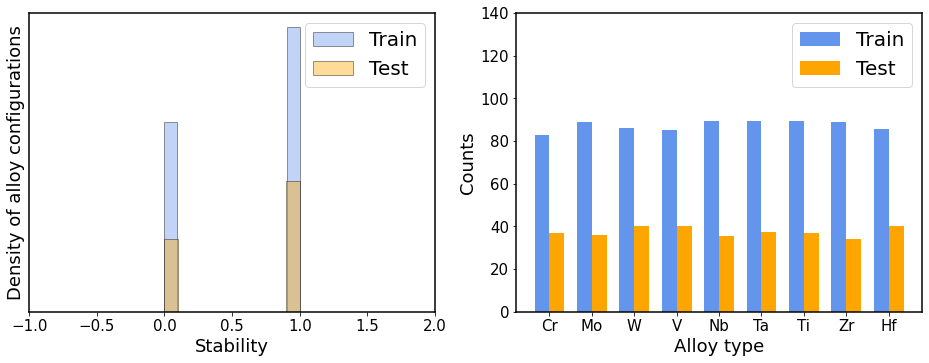

In [7]:
# train and test split

import matplotlib.pyplot as plt
import seaborn as sns

def class_element(data):
    atom = {24:0,42:0,74:0,23:0,41:0,73:0,22:0,40:0,72:0}
    for i in range(len(data)):
        s = set(data[i])
        for j in s:
            if j in atom:
                atom[j] += 1
    atom = atom.items()
    #atom = sorted(atom)
    keys, values = zip(*atom)
    #print(keys)
    return keys, values


#dataset = shuffle(dataset)

training_features, testing_features, training_target, testing_target =  \
        train_test_split(X, Y_log, random_state=42,train_size=0.7, test_size=0.3)

key_train,value_train = class_element(training_features)
w_train = np.array(value_train)/2 #np.array(list(value_train))/sum(list(value_train))

key_test,value_test = class_element(testing_features)
w_test = np.array(value_test)/2 #np.array(list(value_test))/sum(list(value_test))

labels = ['Cr','Mo','W','V','Nb','Ta','Ti','Zr','Hf']
x = np.arange(len(labels))


fig = plt.figure(figsize=(16, 5.5))

ax = fig.add_subplot(1,2,2)
ax.set_xticks(x)
ax.set_xticklabels(labels)
width = 0.35
rects1 = plt.bar(x - width/2, w_train, width,label='Train',alpha=1,color='cornflowerblue')
rects2 = plt.bar(x + width/2, w_test, width, label='Test',alpha=1,color='orange')
plt.xlabel(r'Alloy type',fontsize=18)
plt.ylabel(r'Counts',fontsize=18)
#plt.xlim((-1, 9))
plt.ylim((0, 140))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.spines.values(), linewidth=1.5)
plt.legend(loc="best",fontsize='20')
#plt.title("MSE = {:8.3f}".format(-scores.mean()))
#plt.savefig('fitting.png', bbox_inches='tight')

ax = fig.add_subplot(1,2,1)

sns.distplot(training_target, hist=True, kde=False, 
             bins='auto', color = 'cornflowerblue', 
             hist_kws={'edgecolor':'black'},
             #kde_kws={'linewidth': 2,'shade': True,},
             label=r'Train')
sns.distplot(testing_target, hist=True, kde=False, 
             bins='auto', color = 'orange', 
             hist_kws={'edgecolor':'black'},
             #kde_kws={'linewidth': 2,'shade': True,},
             label=r'Test')

#rects1 = plt.hist(training_target, bins='auto', label='Train',alpha=1, width=0.1,color='cornflowerblue')#color='#0504aa'
#rects2 = plt.hist(testing_target, bins='auto', label='Test',alpha=1, width=0.1,color='orange')
plt.xlabel(r'Stability',fontsize=18)
plt.ylabel(r'Density of alloy configurations',fontsize=18)
plt.xlim((-1, 2))
#plt.ylim((0, 70))
plt.xticks(fontsize=15)
plt.yticks([])
plt.setp(ax.spines.values(), linewidth=1.5)
plt.legend(loc="best",fontsize='20')
#plt.title("MSE = {:8.3f}".format(-scores.mean()))
#plt.savefig('fitting.png', bbox_inches='tight')

plt.show()

In [8]:
#dataset = shuffle(dataset)
#pd.DataFrame(dataset).to_csv("shuffle.csv")
data_list = np.linspace(200,1140,20)#[1140]
#data_list.astype(int)
score_train_rmse = []
score_test_rmse = []
score_train_mae = []
score_test_mae = []
score_train_r2 = []
score_test_r2 = []
for i in data_list:
    i = int(i)
    #x = x_new[0:i][:]
    x = X[0:i][:]
    #X = dataset.iloc[0:i, [2,3,5,6,8,9,11,12,14,15,17,18,20,21,23,24,26,27,29]].values
    #X = dataset.iloc[0:i, [3,6,9,12,15,18,21,24,27]].values
    #X_scaled = preprocessing.normalize(X, norm='l2')
    y = Y_log[0:i]
    #y = y_new[0:i]
    #pd.DataFrame(X).to_csv("X.csv")
    #pd.DataFrame(y).to_csv("y.csv")
    training_features, testing_features, training_target, testing_target = \
                train_test_split(x, y, random_state=42,train_size=0.7, test_size=0.3)
    '''
    sc_X = StandardScaler()
    training_features = sc_X.fit_transform(training_features)
    testing_features = sc_X.transform(testing_features)
    '''
    exported_pipeline = make_pipeline(
        StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=1.0, fit_intercept=True, l1_ratio=0.5, learning_rate="invscaling", loss="squared_hinge", penalty="elasticnet", power_t=0.5)),
        RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.6500000000000001, n_estimators=100), step=0.9000000000000001),
        RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
    )
    # Fix random state for all the steps in exported pipeline
    set_param_recursive(exported_pipeline.steps, 'random_state', 42)

    
    exported_pipeline.fit(training_features, training_target)
    scores_mae = cross_val_score(exported_pipeline, training_features, training_target, scoring="accuracy", cv=10)
    scores_rmse = cross_val_score(exported_pipeline, training_features, training_target, scoring="f1", cv=10)
    scores_r2 = cross_val_score(exported_pipeline, training_features, training_target, scoring="precision", cv=10)
    score_train_mae.append((scores_mae.mean()))
    score_train_rmse.append((scores_rmse.mean()))
    score_train_r2.append((scores_r2.mean()))
    
    scores1_mae = cross_val_score(exported_pipeline, testing_features, testing_target, scoring="accuracy", cv=10)
    scores1_rmse = cross_val_score(exported_pipeline, testing_features, testing_target, scoring="f1", cv=10)
    scores1_r2 = cross_val_score(exported_pipeline, testing_features, testing_target, scoring="precision", cv=10)
    score_test_mae.append((scores1_mae.mean()))
    score_test_rmse.append((scores1_rmse.mean()))
    score_test_r2.append((scores1_r2.mean()))


#results = exported_pipeline.predict(testing_features)
#results = exported_pipeline.predict(X)
#pd.DataFrame(results).to_csv("results.csv")

0.9363611944710412
0.9168449197860962
0.9209840015057406
0.9419238050318339
0.93005517689062
0.9395147885241053


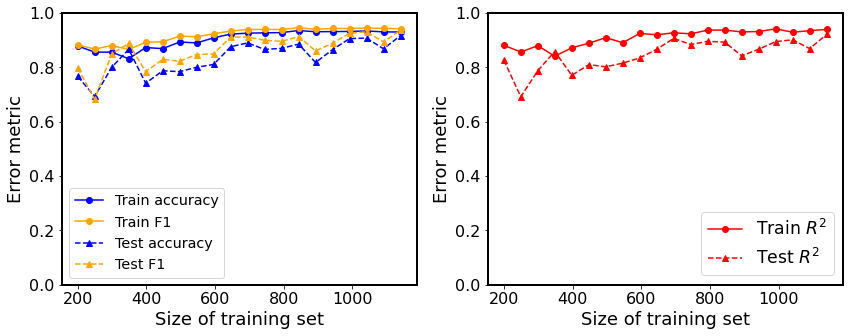

In [9]:
fig = plt.figure(figsize=(14, 5))

ax = fig.add_subplot(1,2,1)

plt.plot(data_list[0:], score_train_mae[0:], linestyle='-', linewidth=1.5, marker='o', label='Train accuracy',color='blue')
plt.plot(data_list[0:], score_train_rmse[0:], linestyle='-', linewidth=1.5, marker='o', label='Train F1',color='orange')

plt.plot(data_list[0:], score_test_mae[0:], linestyle='--', linewidth=1.5, marker='^', label='Test accuracy',color='blue')
plt.plot(data_list[0:], score_test_rmse[0:], linestyle='--', linewidth=1.5, marker='^', label='Test F1',color='orange')

plt.xlabel("Size of training set",fontsize=18)
plt.ylabel("Error metric",fontsize=18)
#plt.xlim((0, 1))
plt.ylim((0, 1))
#plt.title("Learning curve")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.setp(ax.spines.values(), linewidth=2)
plt.legend(loc="best",fontsize='x-large',ncol=1)#bbox_to_anchor=(0.6,0.6),
#plt.savefig('learning_MAE.png', bbox_inches='tight')


#plt.scatter(exported_pipeline.predict(testing_features), testing_target, marker='o', color='blue')
#X_line = np.linspace(-1, 2.5, 100)
#y_line = X_line

print(score_test_rmse[-1])
print(score_test_mae[-1])
print(score_test_r2[-1])
print(score_train_rmse[-1])
print(score_train_mae[-1])
print(score_train_r2[-1])

ax = fig.add_subplot(1,2,2)

plt.plot(data_list[0:], score_train_r2[0:], linestyle='-', linewidth=1.5, marker='o', label='Train $R^2$',color='red')
plt.plot(data_list[0:], score_test_r2[0:], linestyle='--', linewidth=1.5, marker='^', label='Test $R^2$',color='red')
plt.xlabel("Size of training set",fontsize=18)
plt.ylabel("Error metric",fontsize=18)
#plt.xlim((0, 1))
plt.ylim((0, 1))
#plt.title("Learning curve")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.setp(ax.spines.values(), linewidth=2)
plt.legend(bbox_to_anchor=(1,0.3),fontsize='xx-large',ncol=1)#loc="best"
#plt.savefig('learning_MAE.png', bbox_inches='tight')
plt.show()

C:\Users\Public\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


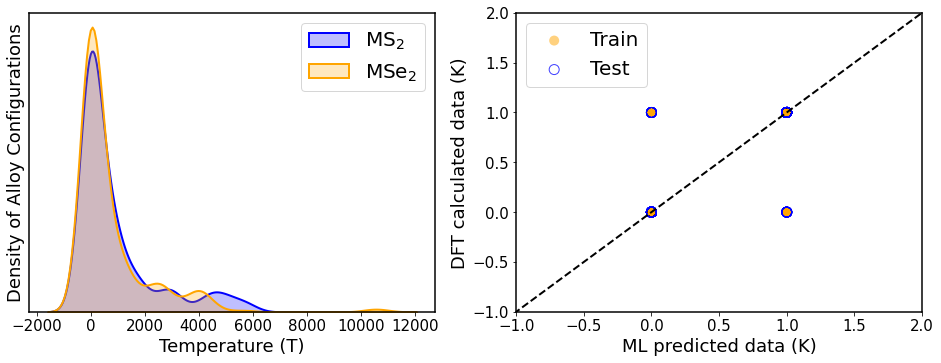

In [23]:
fig = plt.figure(figsize=(16, 5.5))
#ax = fig.add_subplot(111)
ax = fig.add_subplot(1,2,2)
plt.scatter(exported_pipeline.predict(training_features), training_target, marker='o', color='orange', label="Train", alpha = 0.5, s=100, edgecolors='none')
plt.scatter(exported_pipeline.predict(testing_features), testing_target, marker='o', color='none', label="Test",  alpha = 0.75, s=100, edgecolors='blue')#
#plt.plotmarkerfacecolor='none'
X_line = np.linspace(-1000, 6000, 100)
y_line = X_line
plt.plot(X_line, y_line, "k--",label='_Hidden label',linewidth=2)
plt.xlabel(r'ML predicted data (K)',fontsize=18)
plt.ylabel(r'DFT calculated data (K)',fontsize=18)
plt.xlim((-1, 2))
plt.ylim((-1, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.spines.values(), linewidth=1.5)
plt.legend(loc="best",fontsize='20')

ax = fig.add_subplot(1,2,1)
dataset = pd.read_csv('../Prediction/ydata.csv')
ys_1 = dataset.iloc[0:290, 1].values
yse_1 = dataset.iloc[290:, 1].values

ys = np.concatenate([ys_1,y2])
yse = np.concatenate([yse_1,y3])


# seaborn histogram
ax = sns.distplot(ys, hist=False, kde=True, 
             bins=int(3.5/0.1), color = 'blue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'shade': True,},
             label=r'MS$_2$')

sns.distplot(yse, hist=False, kde=True, 
             bins=int(3.5/0.1), color = 'orange', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'shade': True,},
             label=r'MSe$_2$')


# Add labels
#for _,s in ax.spines.items():
#    s.set_linewidth(1.5)
    #s.set_color('cyan')
#plt.title('Histogram of Arrival Delays')
plt.xlabel(r'Temperature (T)',fontsize=18)
plt.ylabel('Density of Alloy Configurations',fontsize=18)
#plt.plot([-0.1,-0.1],[-0.1,1.6],'k--', linewidth=2)
#plt.plot([0.1,0.1],[-0.1,1.6],'k--', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks([])
#plt.ylim((0,1.6))
#plt.rcParams['axes.linewidth'] = 30
plt.setp(ax.spines.values(), linewidth=1.5)
plt.legend(loc="best",fontsize='20')
#plt.savefig('Density.png', bbox_inches='tight')
#plt.title("MSE = {:8.3f}".format(-scores.mean()))
#plt.savefig('fitting.png', bbox_inches='tight')
plt.show()


In [10]:
import joblib #jbolib模块

#保存Model
joblib.dump(exported_pipeline, 'stab_class_1500k.pkl')

#读取Model
#clf3 = joblib.load('model1.pkl')

['stab_class_1500k.pkl']